In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pwd

'C:\\Users\\Mayank Singh\\Desktop\\Stuff\\Machine_Learning_Projects\\Housing_Price_Prediction'

In [5]:
df = pd.read_csv("Ames_Housing_Data.csv")

In [9]:
with open("Ames_Housing_Feature_Description.txt") as file:
    print(file.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [10]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [19]:
perc_nan = df.isnull().sum()*100/len(df)
perc_nan = perc_nan[perc_nan>0].sort_values()

Electrical         0.034130
Garage Cars        0.034130
BsmtFin SF 1       0.034130
Garage Area        0.034130
BsmtFin SF 2       0.034130
Bsmt Unf SF        0.034130
Total Bsmt SF      0.034130
Bsmt Half Bath     0.068259
Bsmt Full Bath     0.068259
Mas Vnr Area       0.784983
Bsmt Qual          2.730375
Bsmt Cond          2.730375
BsmtFin Type 1     2.730375
BsmtFin Type 2     2.764505
Bsmt Exposure      2.832765
Garage Type        5.358362
Garage Qual        5.426621
Garage Cond        5.426621
Garage Yr Blt      5.426621
Garage Finish      5.426621
Lot Frontage      16.723549
Fireplace Qu      48.532423
Mas Vnr Type      60.580205
Fence             80.477816
Alley             93.242321
Misc Feature      96.382253
Pool QC           99.556314
dtype: float64

In [38]:
# df = df.drop("Fence",axis = 1)
df = df.drop("Misc Feature",axis = 1)

In [40]:
perc_nan = df.isnull().sum()*100/len(df)
perc_nan = perc_nan[perc_nan>0].sort_values()
print(perc_nan)

Total Bsmt SF      0.034130
Garage Area        0.034130
BsmtFin SF 1       0.034130
BsmtFin SF 2       0.034130
Bsmt Unf SF        0.034130
Garage Cars        0.034130
Electrical         0.034130
Bsmt Half Bath     0.068259
Bsmt Full Bath     0.068259
Mas Vnr Area       0.784983
Bsmt Qual          2.730375
Bsmt Cond          2.730375
BsmtFin Type 1     2.730375
BsmtFin Type 2     2.764505
Bsmt Exposure      2.832765
Garage Type        5.358362
Garage Finish      5.426621
Garage Cond        5.426621
Garage Qual        5.426621
Garage Yr Blt      5.426621
Lot Frontage      16.723549
Fireplace Qu      48.532423
Mas Vnr Type      60.580205
dtype: float64


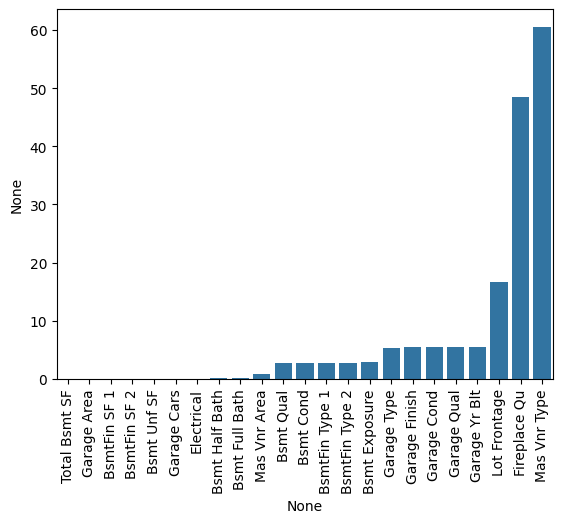

In [43]:
# plt.figure(figsize = (8))
sns.barplot(x = perc_nan.index,y = perc_nan)
plt.xticks(rotation = 90);